# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


from the above , we can our dataset is having 32560 rows and 15 columns.Our target lable is income ,which is catogorical data so we have to build a classification model who can predict wheather the salary is above or below 50k.

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis

In [5]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 32560
No of Columns: 15


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

there are 15 columns out of which income is our target variable and other 14 are feature columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


there are 2 datatypes in the dataset int64 and object

In [8]:
# no of unique values in the dataset
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
df.isin([' ','NA','-']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
# There is some Question Mark available in Date set.
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [14]:
df=df.replace(' ?',np.nan)

In [15]:
# checking duplicate values
df.duplicated().sum()

24

In [16]:
# Removing Duplicate values
df= df.drop_duplicates()

In [17]:
# checking for null values
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

There are null values present in the dataset.

<Axes: >

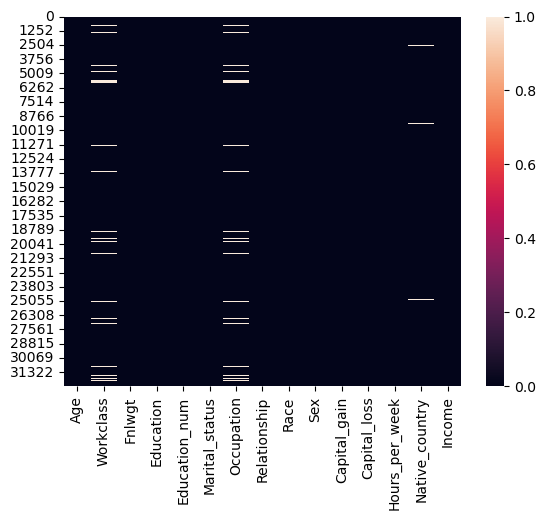

In [18]:
# visualization using the heatmap
sns.heatmap(df.isnull())

# Removing null values

In [19]:
# filling the missing values with mode for categorical feature
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [20]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [21]:
obj = (df.dtypes == 'object')
print("Categorical variables:",list(obj[obj].index))

Categorical variables: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [22]:
categories=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for i in categories:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Education
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64
Marital_status
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
Occupation
Occupation
 Prof-specialty       

# Data Visualization

### univariate analysis

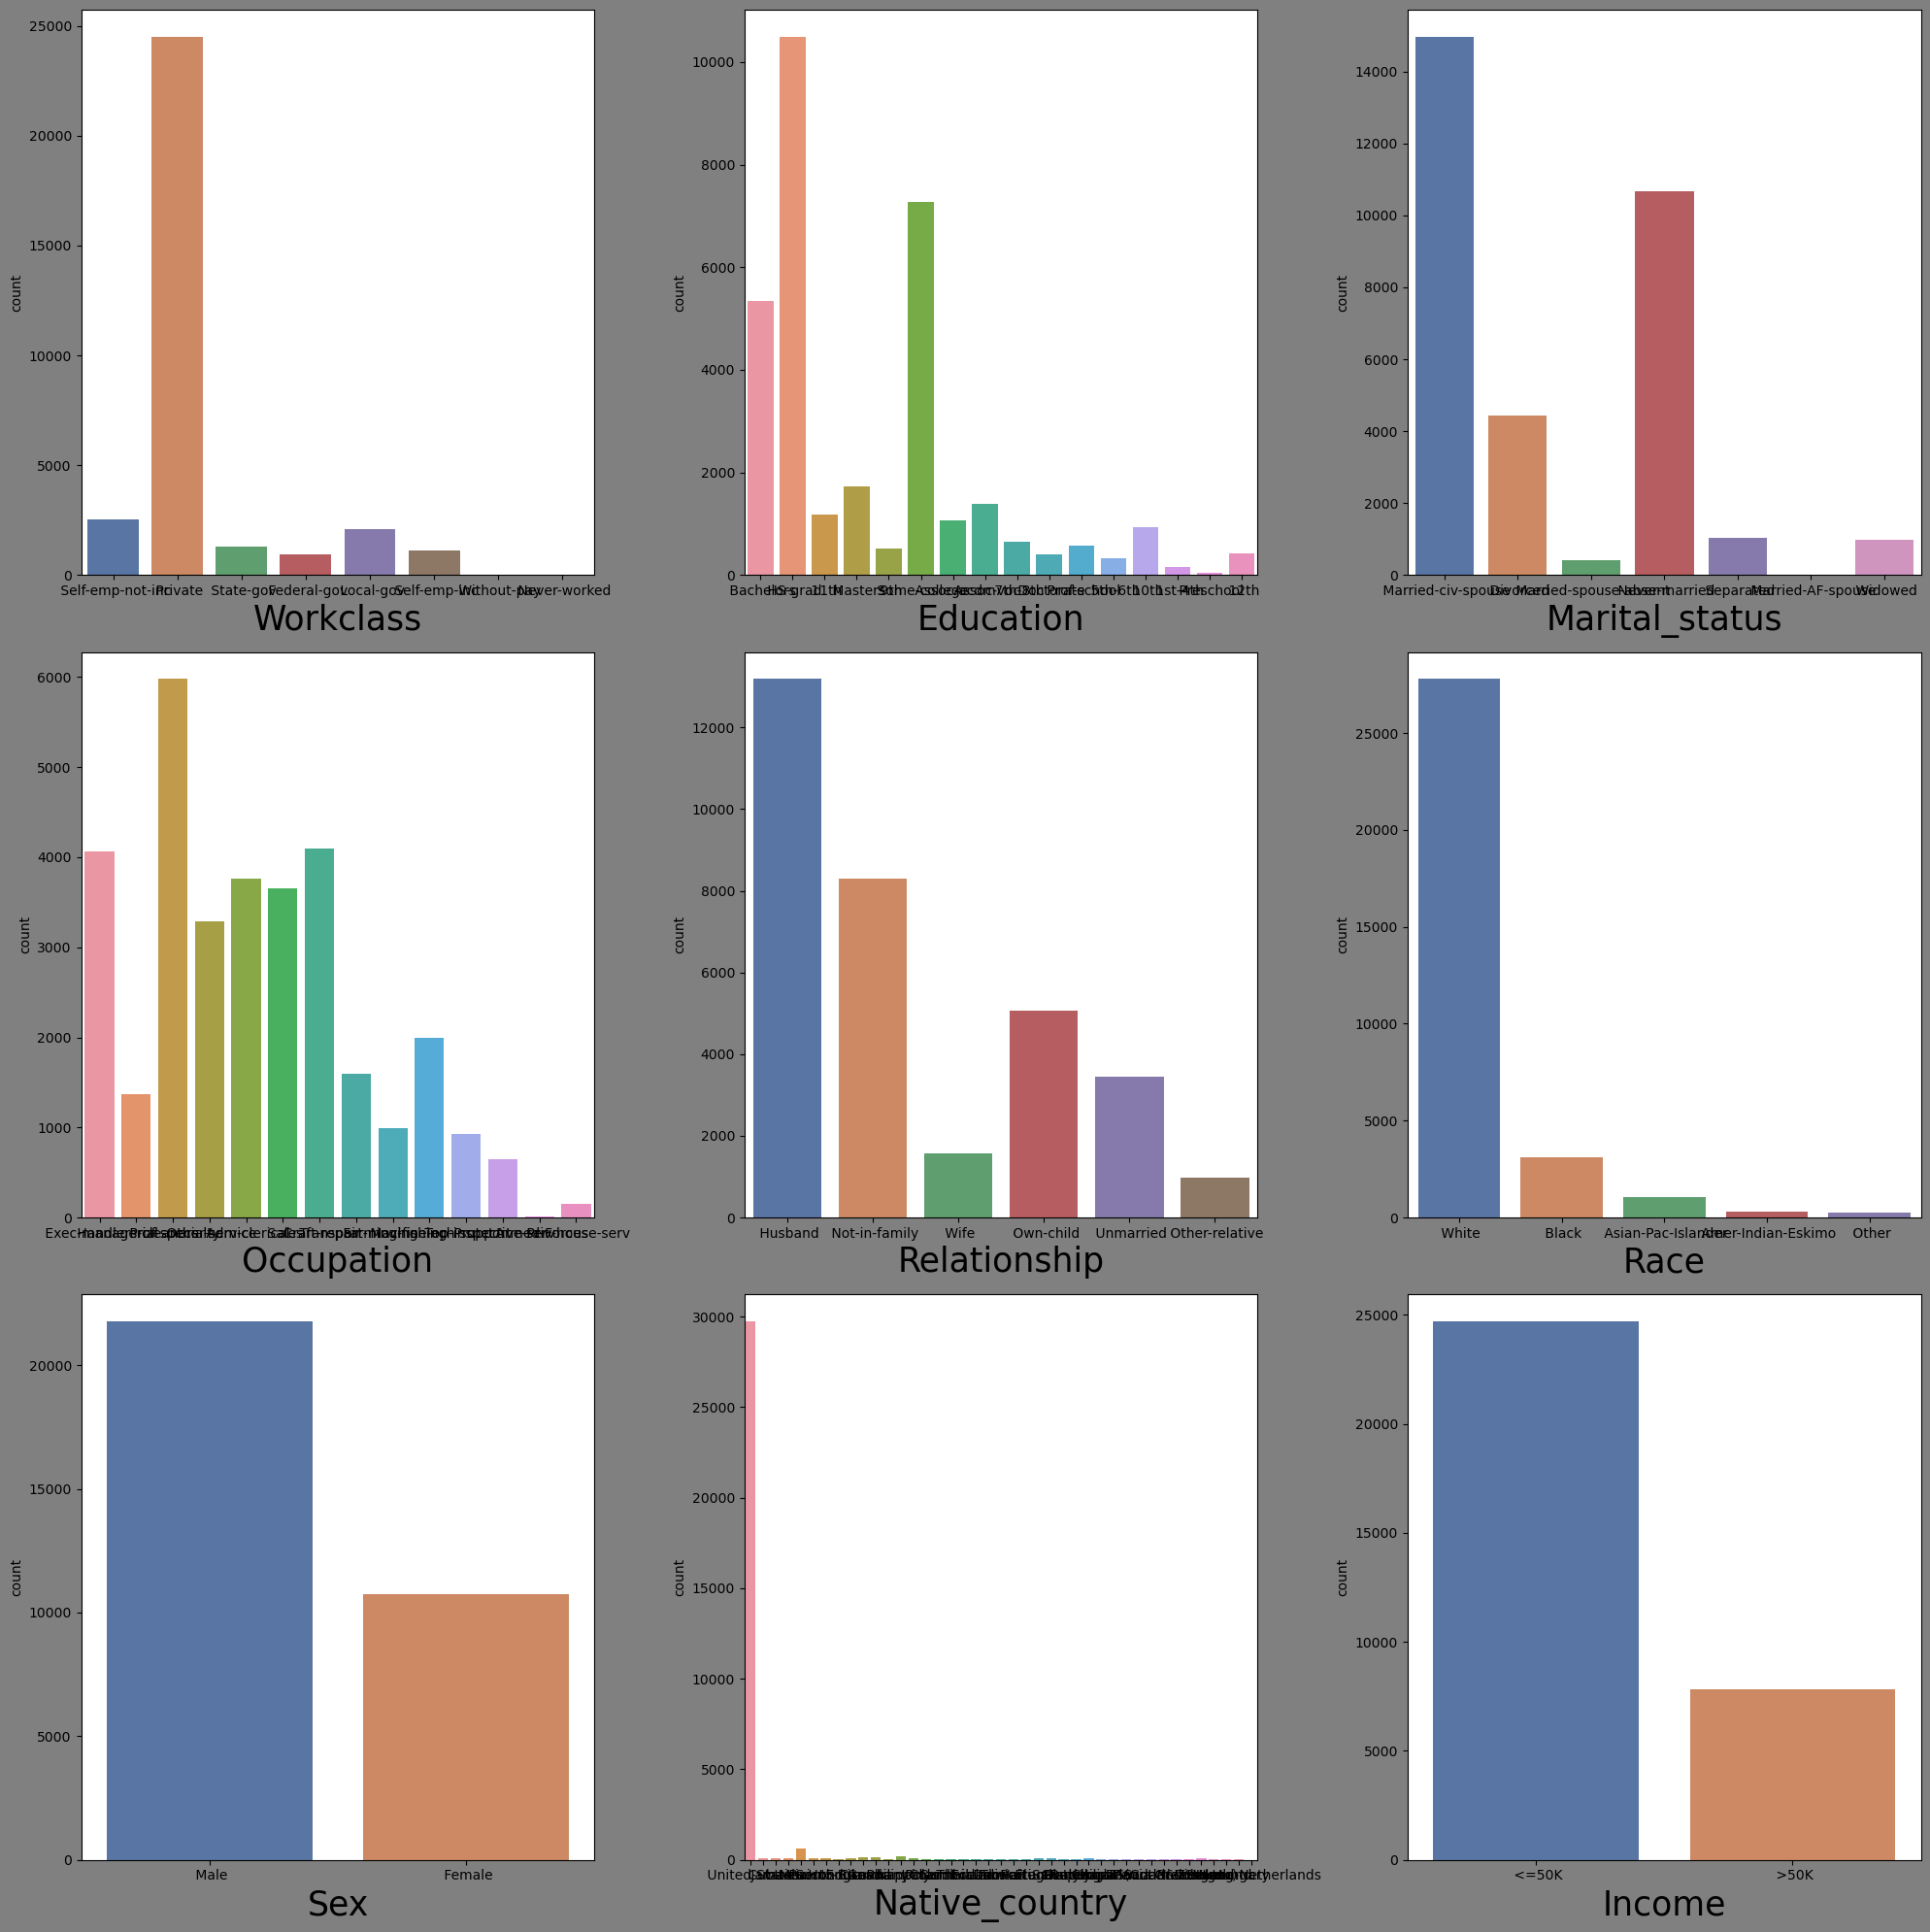

In [23]:
sns.set_palette('deep')
plt.figure(figsize=(20,20), facecolor='grey')

for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

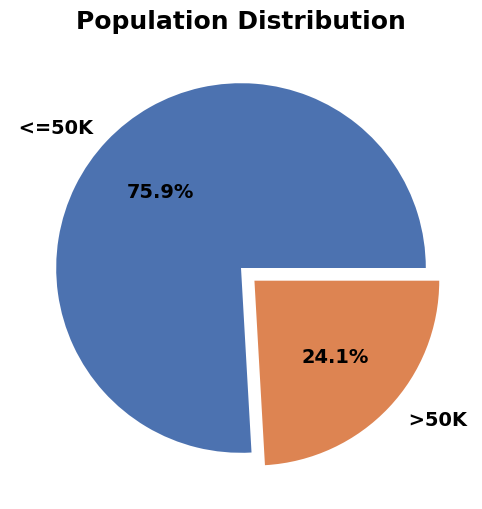

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Set pie plot parameters
plt.rcParams["figure.autolayout"] = True
sns.set_palette('deep')

# Plot pie chart
df['Income'].value_counts().plot.pie(explode=[0, 0.1], autopct='%3.1f%%',
                                     textprops={'fontweight': 'bold', 'fontsize': 14}, ax=ax)
ax.set_title('Population Distribution', fontsize=18, fontweight='bold')
ax.set_ylabel('')

plt.show()


75.9 % population (24697 peoples) have income less than 50K.

### Bivariate analysis

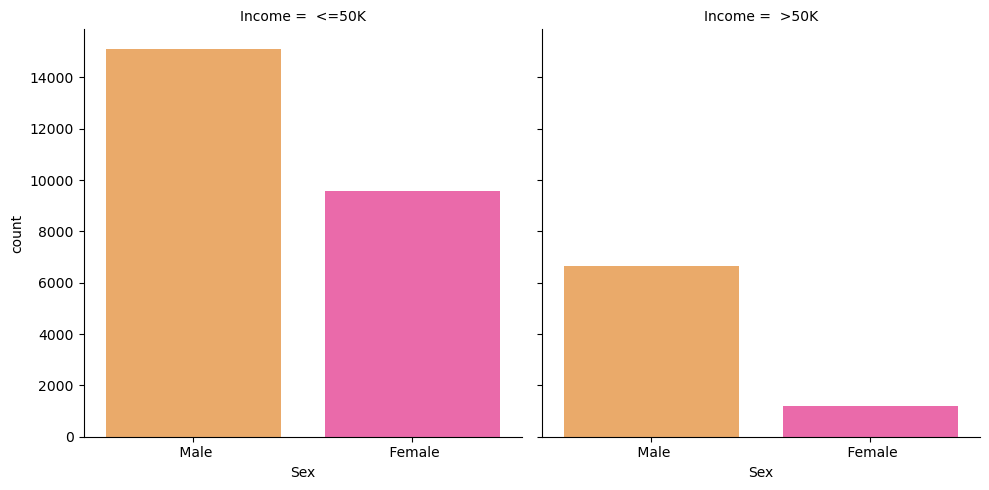

In [25]:
# Comparing Income on the base of sex
sns.catplot(x='Sex',col='Income',data=df,kind='count',palette='spring_r')

there are more male with income more than 50K

<Figure size 1000x600 with 0 Axes>

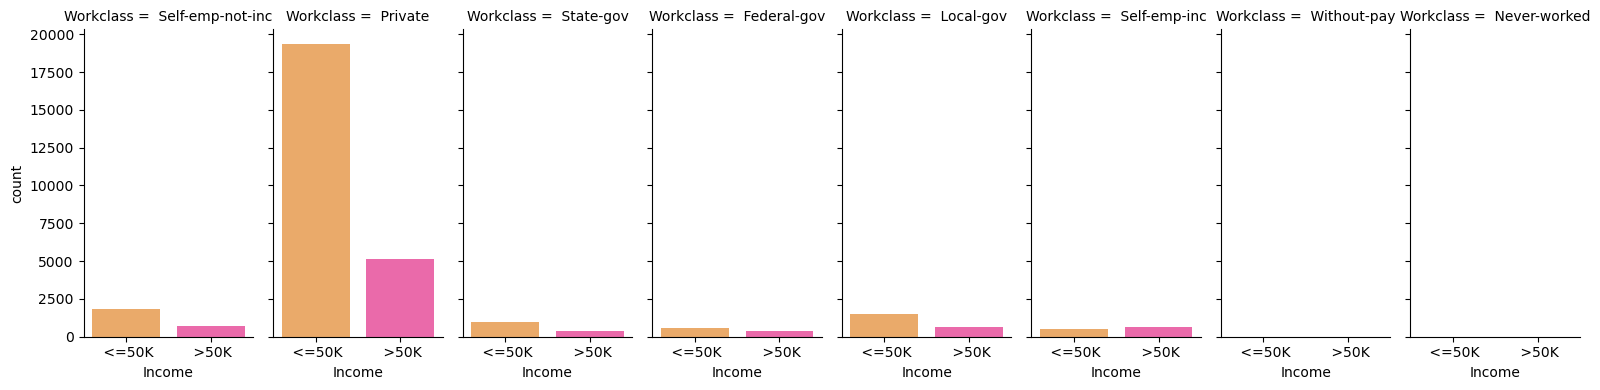

In [26]:
# Comparing Income on the base of Workclass
plt.figure(figsize=(10, 6))
sns.catplot(x='Income', col='Workclass', data=df, kind='count', palette='spring_r',height=4, aspect=0.5)

people working in private sector have mo no of people having 50K plus income

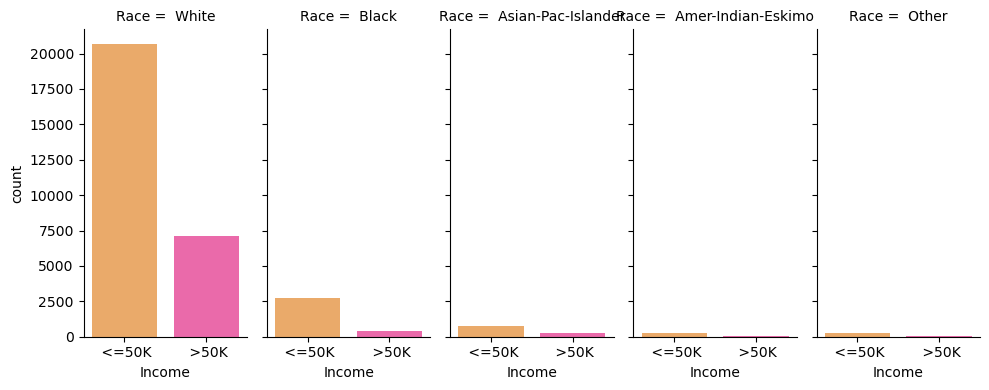

In [27]:
# Comparing Income on the base of race
sns.catplot(x='Income',col='Race',data=df,kind='count',palette='spring_r',height=4, aspect=0.5)

there is a huge difference of no of people having more than 50K on income in white , balck , asia pecific race

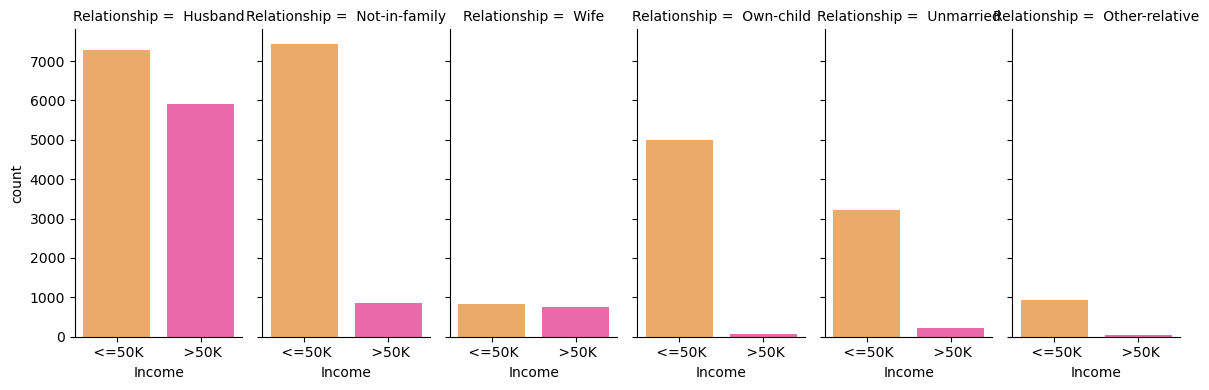

In [28]:
# Comparing Income on the base of Relationship
sns.catplot(x='Income',col='Relationship',data=df,kind='count',palette='spring_r',height=4, aspect=0.5)

people having more than 50K of income are on higher side in all the relation exceplt wife where it seems to be equal

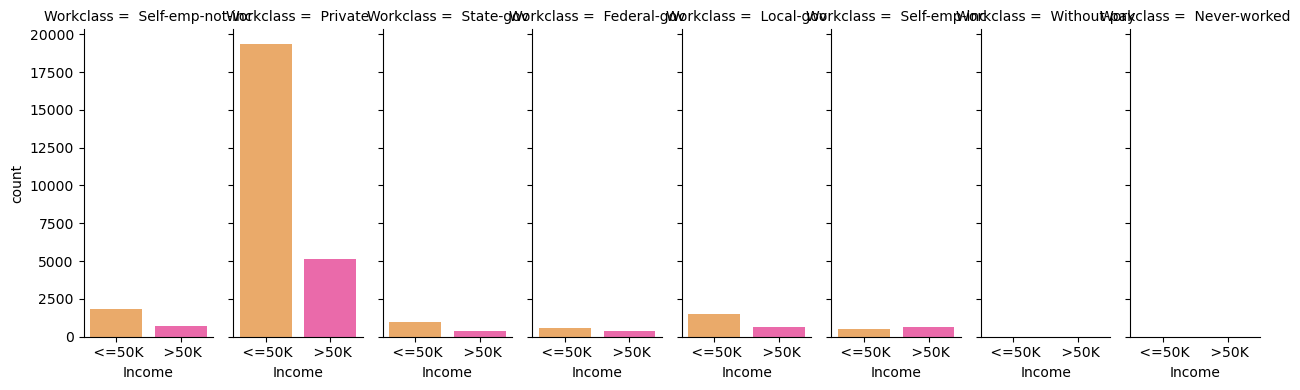

In [29]:
# Comparing Income on the base of Workclass
sns.catplot(x='Income',col='Workclass',data=df,kind='count',palette='spring_r',height=4, aspect=0.4)

In all the working class we can see that 50K plus people are more except without and never worked before

In [30]:
#Seperating Numerical and categorical columns

categorical=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical.append(i)
print("Categorical columns are:",categorical)
print('\n')

numerical=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical.append(i)
print("Numerical columns are:",numerical)
print("\n")

Categorical columns are: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical columns are: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']




# label encoding for categorrical columns

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categories:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


# statistical analysis

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Workclass,32536.0,3.094357,1.107449,0.0,3.0,3.0,3.00,7.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education,32536.0,10.297547,3.870195,0.0,9.0,11.0,12.00,15.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Marital_status,32536.0,2.611384,1.506304,0.0,2.0,2.0,4.00,6.0
Occupation,32536.0,6.139476,3.973089,0.0,3.0,6.0,9.00,13.0
Relationship,32536.0,1.446552,1.607087,0.0,0.0,1.0,3.00,5.0
Race,32536.0,3.665816,0.848858,0.0,4.0,4.0,4.00,4.0
Sex,32536.0,0.669228,0.470498,0.0,0.0,1.0,1.00,1.0


# Correlation between the dataset

<Axes: >

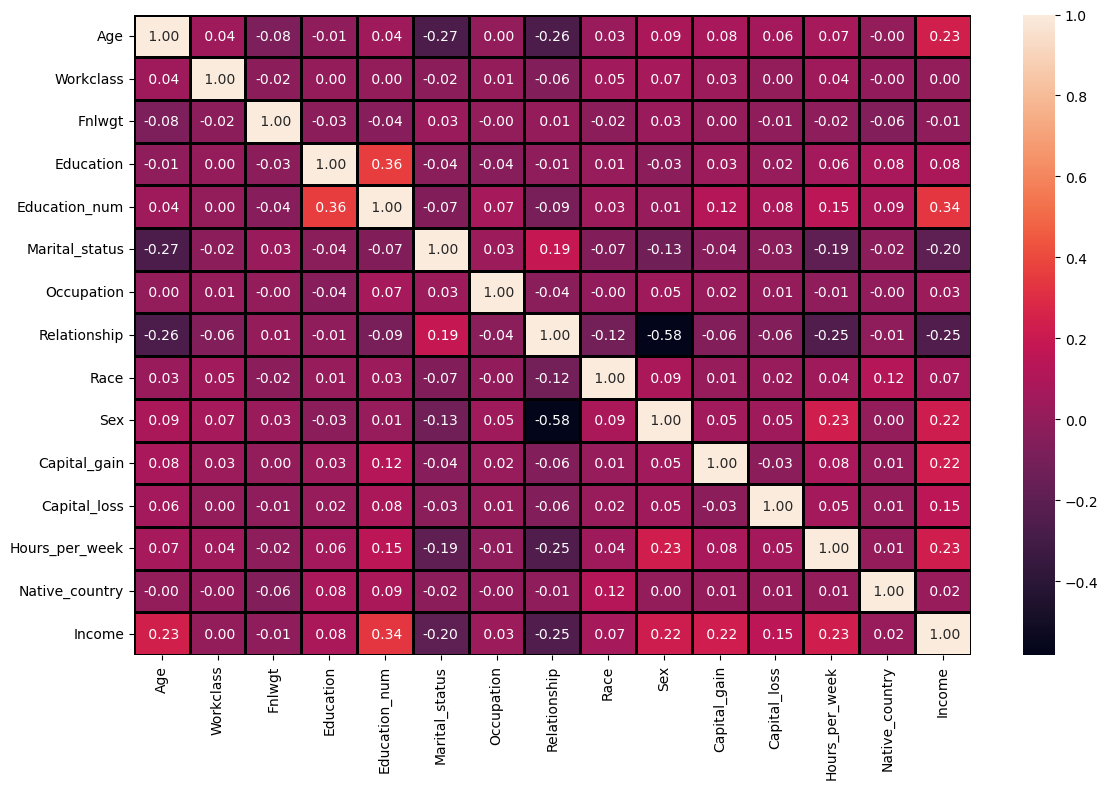

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

# Outlier detection

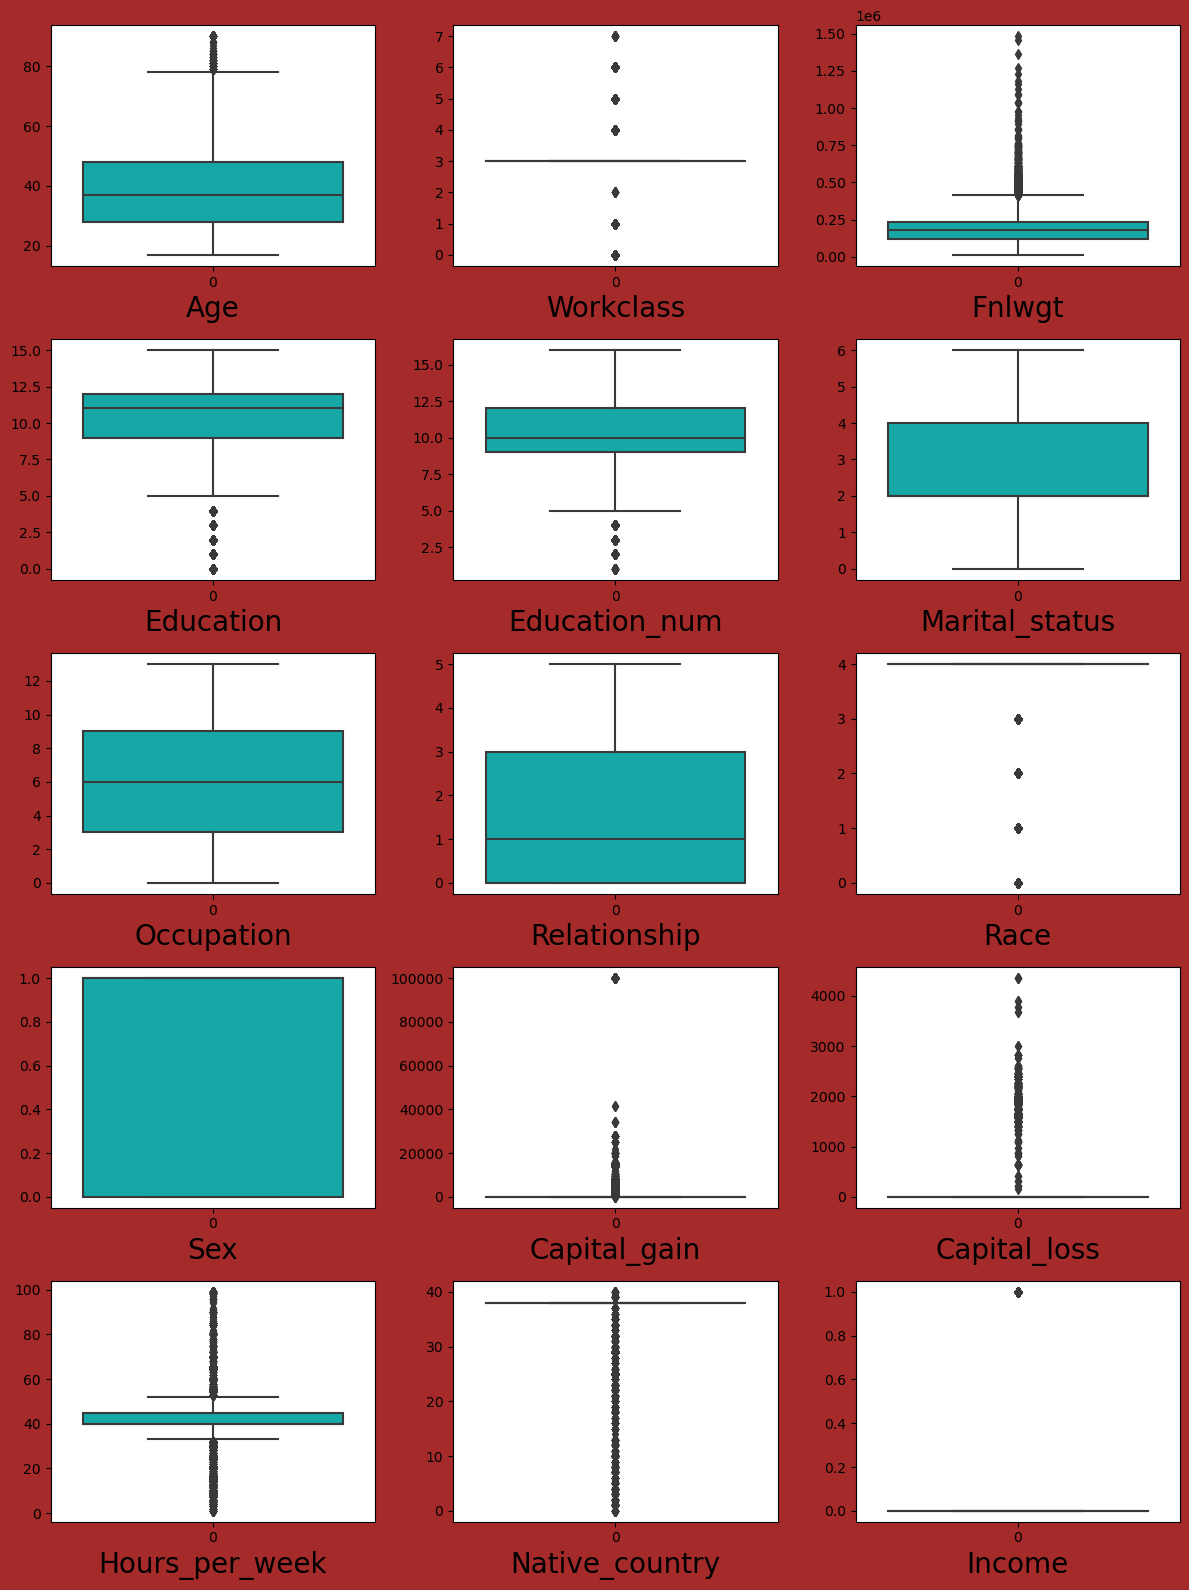

In [34]:
plt.figure(figsize=(12,16),facecolor='brown')
index=1
for column in df:
    if index <=15:
        ax = plt.subplot(5,3,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

These columns have Outliers ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Race', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

# removal of outliers

In [35]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers =  ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Race', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

In [36]:
print ("Shape of the DataFrame before removing Outliers: ", df.shape)
print ("\nShape of the DataFrame after removing Outliers: ", df1.shape)
print ("\nPercentage of Data loss After Outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100,'%')

Shape of the DataFrame before removing Outliers:  (32536, 15)

Shape of the DataFrame after removing Outliers:  (27751, 15)

Percentage of Data loss After Outlier removal:  14.706786328989427 %


# checking skewness of the dataset

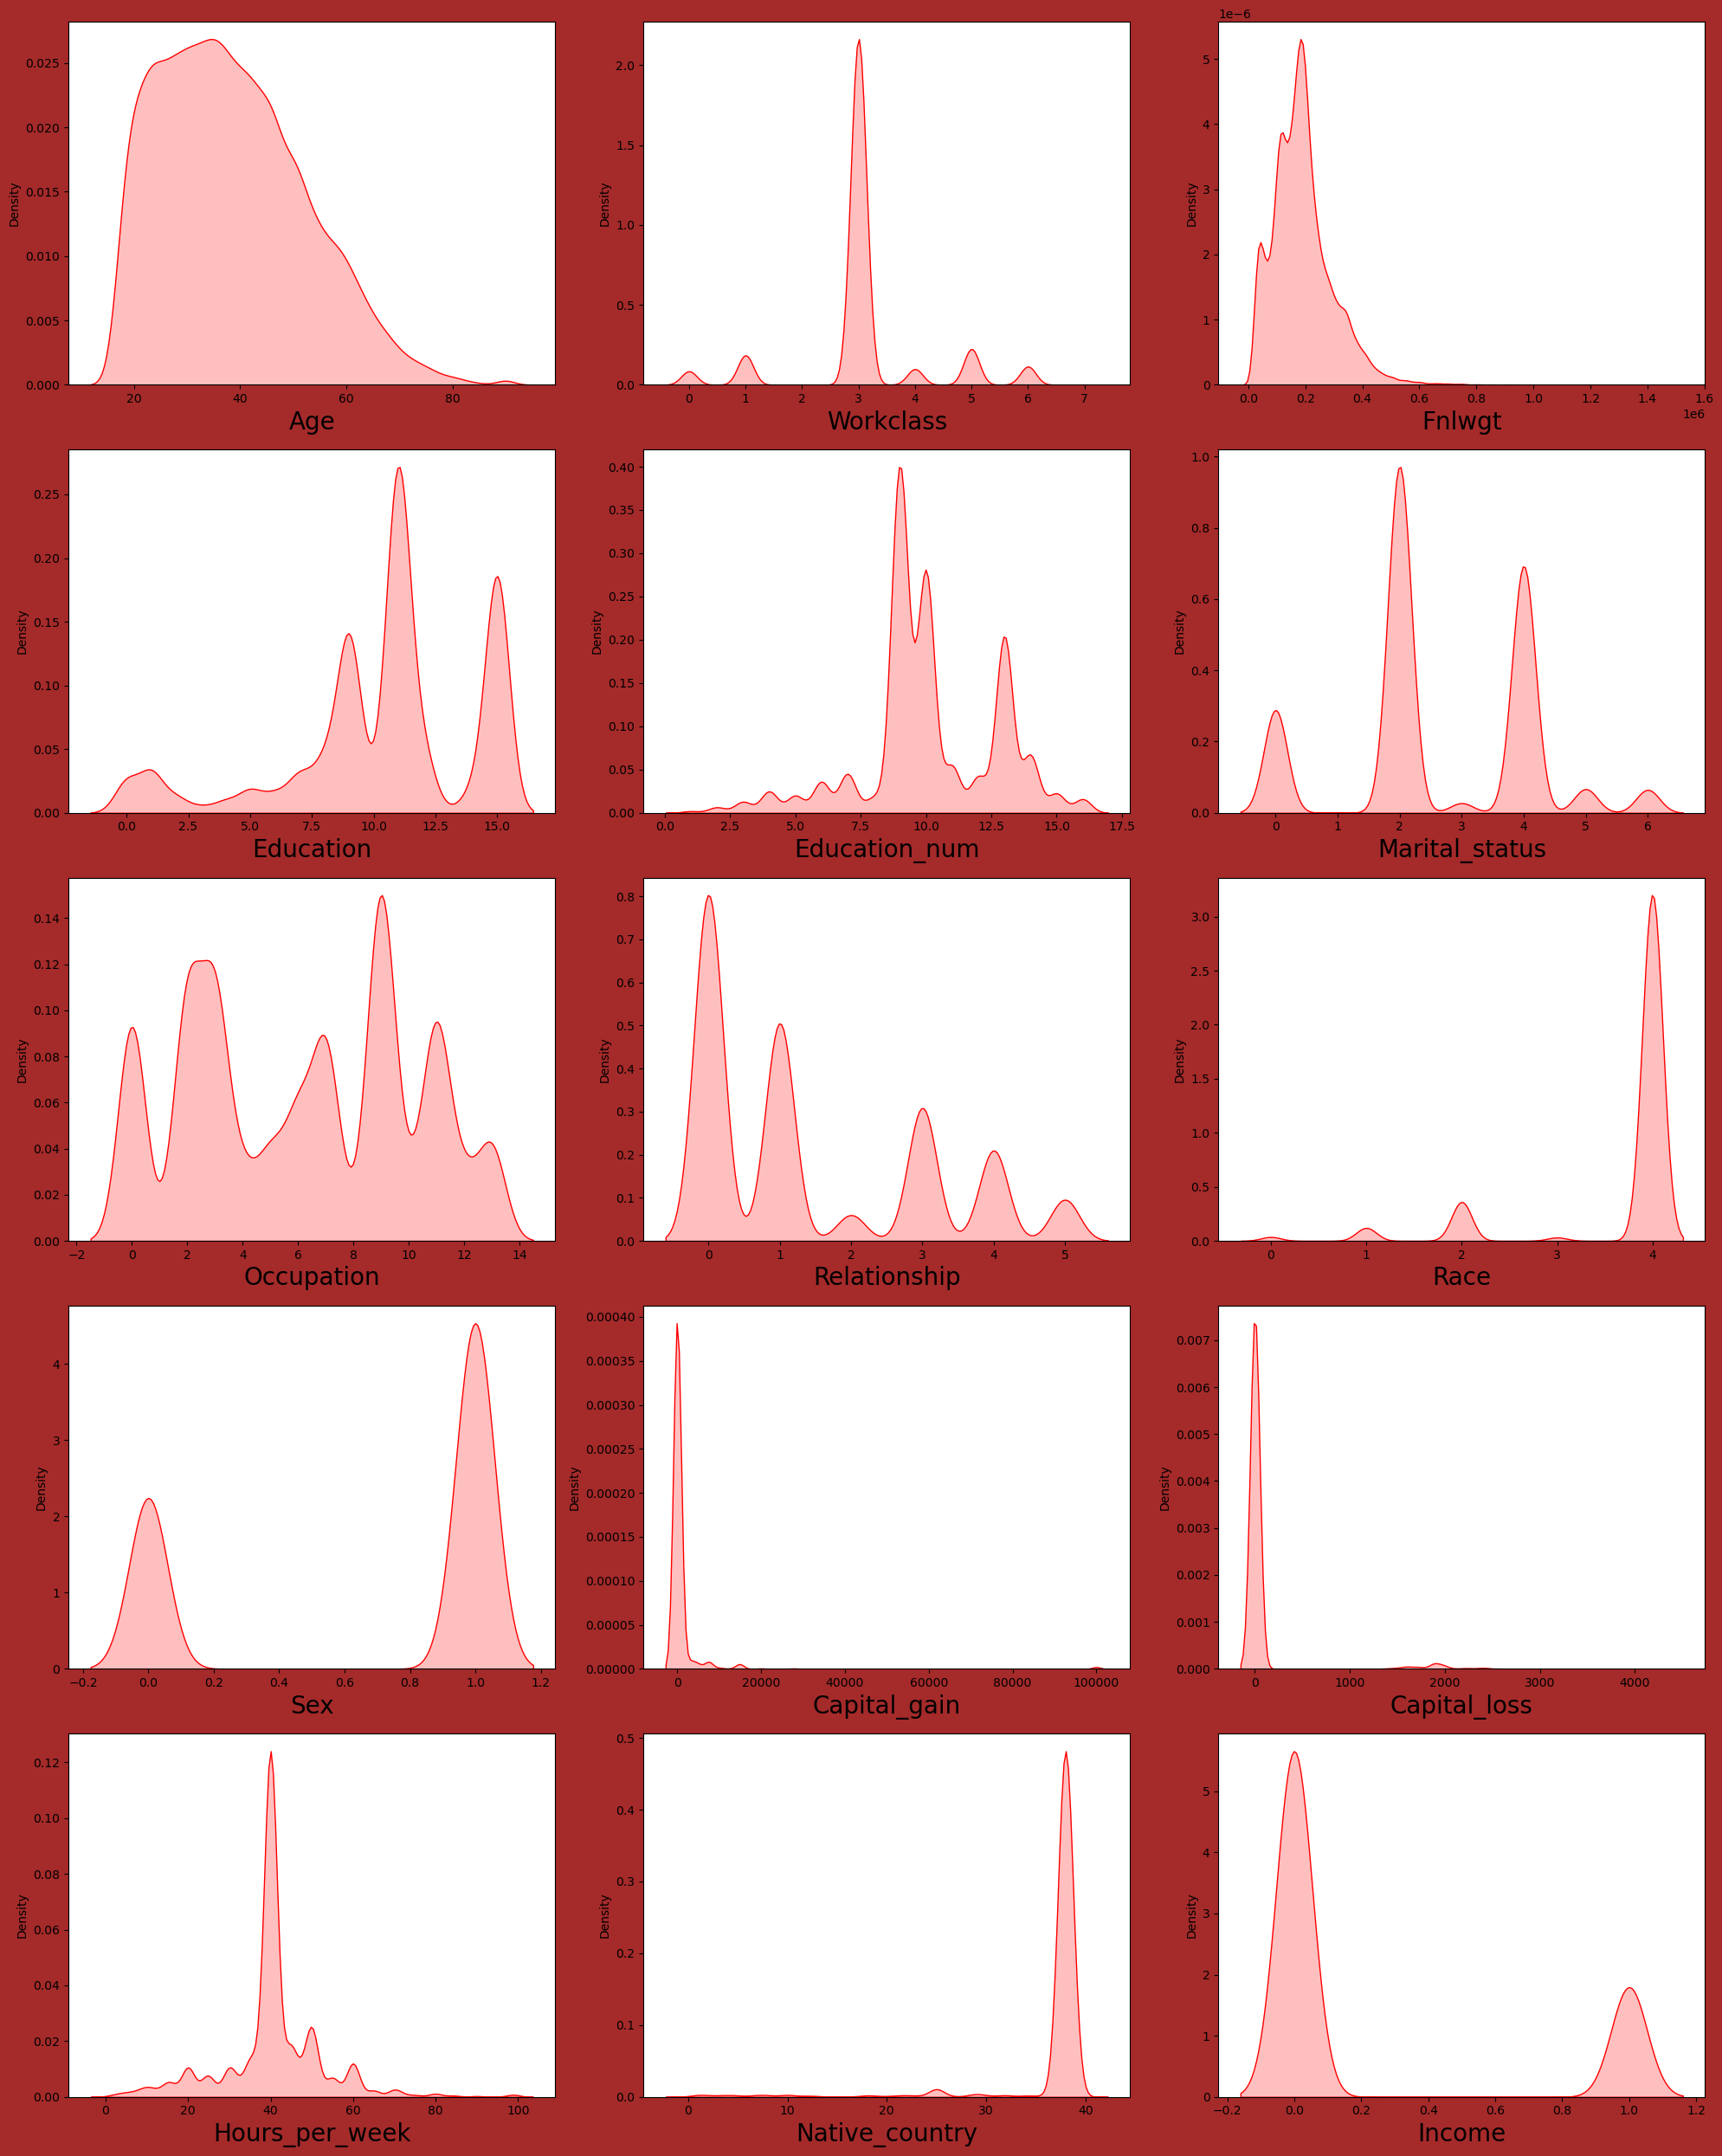

In [37]:
plt.figure(figsize=(20,25), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [38]:
df.skew()

Age                0.557657
Workclass          0.075983
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

some columns are rightly skewed and some are left skewed.

# Removal of skewness

In [39]:
# Removing of right skewed data.
Right_skew=['Fnlwgt','Relationship','Capital_gain', 'Capital_loss']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df[Right_skew] = scaler.fit_transform(df[Right_skew].values)

In [40]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['Education','Sex','Native_country','Race']
# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x + 1)[0])

In [41]:
df.skew()

Age               0.557657
Workclass         0.075983
Fnlwgt            0.016961
Education        -0.309379
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.000407
Relationship      0.123000
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
Native_country   -2.984449
Income            1.211640
dtype: float64

# splitting dataset

In [42]:
X = df.drop(columns = ["Income"])
y = df["Income"]

# standard scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_scaled=scaler.fit_transform(X)

# variance_inflation_factor

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Age,0.691605
1,Workclass,0.698517
2,Fnlwgt,1.000624
3,Education,0.838734
4,Education_num,0.590421
5,Marital_status,0.811325
6,Occupation,0.874696
7,Relationship,1.012609
8,Race,0.782729
9,Sex,0.926486


# Machine learning model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score

In [47]:
# Spliting into train and test data
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    
X_train.shape

(26028, 14)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 83.8660110633067 on Random_state 119


In [49]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.8311309157959434


Confusion matrix of Logistics Regression : 
 [[4616  309]
 [ 790  793]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4925
           1       0.72      0.50      0.59      1583

    accuracy                           0.83      6508
   macro avg       0.79      0.72      0.74      6508
weighted avg       0.82      0.83      0.82      6508



# DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

maxAccu1=0
maxRS1=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred1=dtc.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy Score is: ', (maxAccu1)*100 ,'\nAt Random State: ', maxRS1)

Best accuracy Score is:  81.57652120467117 
At Random State:  109


# Classification Algorithm

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, y_pred))
    print('\n')
    
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.8345113706207744


Confusion matrix : 
 [[4612  314]
 [ 763  819]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4926
           1       0.72      0.52      0.60      1582

    accuracy                           0.83      6508
   macro avg       0.79      0.73      0.75      6508
weighted avg       0.83      0.83      0.82      6508



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.7977873386601106


Confusion matrix : 
 [[4132  794]
 [ 522 1060]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      4926
           1       0.57      0.67      0.62      1582

    accuracy                           0.80      6508
   macro avg       0.73      0.75      0.74      6508
weighted avg       0.81      0.80      0.80     

# Hyperparrameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}

In [55]:
grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.788 total time=   2.6s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.795 total time=   2.8s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.799 total time=   2.9s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.797 total time=   2.8s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.798 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.791 total time=   5.3s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.799 total time=   5.5s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [56]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Final Model

In [57]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 400)

In [58]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(y_test, pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(y_test,pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8322065150583897


Confusion matrix ofRandomForestClassifier : 
 [[4860   66]
 [1026  556]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      4926
           1       0.89      0.35      0.50      1582

    accuracy                           0.83      6508
   macro avg       0.86      0.67      0.70      6508
weighted avg       0.84      0.83      0.80      6508



In [59]:
prediction=pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction.head(60)


,predicted values,actual values
24667,0,0
28100,0,0
29227,0,1
10346,0,1
10923,0,0
23766,0,0
27977,0,1
2752,1,1
21192,0,1
12080,0,0


# Saving model

In [60]:
import joblib
joblib.dump(model,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']